In [1]:
import sys
import os

import importlib
sys.path.insert(0,'..')

import scanflow

from scanflow.setup import Setup, Executor, Workflow
from scanflow.special import Tracker, Checker, Improver
from scanflow.deploy import Deploy


importlib.reload(scanflow)

<module 'scanflow' from '../scanflow/__init__.py'>

In [2]:
%%time


# App folder
base_path = os.path.dirname(os.getcwd())
app_dir = os.path.join(base_path, "examples/demo2/data-science/")

executors = [Executor(name='gathering', 
                       file='gathering.py',
                       dockerfile='Dockerfile_gathering'),

              
              Executor(name='preprocessing', 
                       file='preprocessing.py',
                       requirements='req_preprocessing.txt')]

workflow1 = Workflow(name='workflow1', 
                     executors=executors,
                     tracker=Tracker(port=8001))


setup = Setup(app_dir, workflows=[workflow1],
                             verbose=False)

setup

29-Nov-20 01:15:03 -  INFO - [+] Port 8001 is set successfully.


CPU times: user 2.21 ms, sys: 279 µs, total: 2.49 ms
Wall time: 1.63 ms



Setup = (
    Workflows: ['workflow1']
)

In [3]:
# setup.draw_workflow()

In [4]:
# Start containers and run workflows
deployer = Deploy(app_dir, setup, verbose=False)
deployer

<class 'scanflow.deploy.deploy.Deploy'>

In [5]:
deployer.build_workflows()

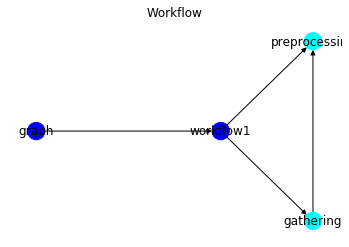

In [6]:
deployer.draw_workflow()

In [7]:
deployer.start_workflows()

100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


In [8]:
deployer.run_workflows()

100%|██████████| 1/1 [00:03<00:00,  3.16s/it]

Elapsed time: 3.170100450515747
